In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
# define the state
class BMIstate(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [3]:
def cal_bmi(state: BMIstate) -> BMIstate:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = round((weight/height**2), 2)

    state['bmi'] = bmi

    return state


In [4]:
def lbl_bmi(state: BMIstate) -> BMIstate:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = "Underweight"
    elif 18.5 <= bmi < 25:
        state['category'] = "Normal"
    elif 25 <= bmi < 30:
        state['category'] = "Overweight"
    else:
        state['category'] = "Obese"

    return state

In [5]:
# define the graph
graph = StateGraph(BMIstate)

# add nodes to the graph
graph.add_node("calculate bmi", cal_bmi)
graph.add_node("label bmi", lbl_bmi)

# add edges to the graph
graph.add_edge(START, "calculate bmi")
graph.add_edge("calculate bmi", "label bmi")
graph.add_edge("label bmi", END)

# compile the graph
workflow = graph.compile()

In [6]:
# execute the graph
workflow.invoke({'weight_kg': 80, 'height_m': 1.7})

{'weight_kg': 80, 'height_m': 1.7, 'bmi': 27.68, 'category': 'Overweight'}

## Visualizing the grph

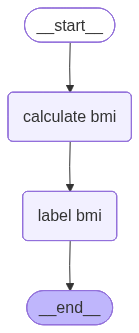

In [7]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))